<a href="https://colab.research.google.com/github/naom99/IT22/blob/main/%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf 

#해당 코드 실행 후 런타임을 다시 실행하면 한글이 깨지지 않음

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
#패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
#파일 경로 설정
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#데이터 불러오기
charts = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Bigmining/charts_new.csv",  encoding='cp949')

In [ ]:
#데이터 탐색하기
display(charts.head())

,week,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,1,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,1,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,1,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,1,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [ ]:
#데이터 탐색하기2
charts.describe

<bound method NDFrame.describe of         week        date  rank                                 song  \
0          1  2021-11-06     1                           Easy On Me   
1          1  2021-11-06     2                                 Stay   
2          1  2021-11-06     3                        Industry Baby   
3          1  2021-11-06     4                           Fancy Like   
4          1  2021-11-06     5                           Bad Habits   
...      ...         ...   ...                                  ...   
330082     2  1958-08-04    96                        Over And Over   
330083     2  1958-08-04    97                     I Believe In You   
330084     2  1958-08-04    98                      Little Serenade   
330085     2  1958-08-04    99  I'll Get By (As Long As I Have You)   
330086     2  1958-08-04   100                                 Judy   

                               artist  last-week  peak-rank  weeks-on-board  
0                               Ade

0-1) 적정한 기간 설정: 2000년 1월 ~ 2019년 12월까지 10년간의 데이터 추출

In [ ]:
#date를 인덱스로 설정
charts = charts.set_index('date')

#기간에 맞는 행만 추출해 charts에 저장
charts = charts['2019-12-31':'2000-01-01']

#artist를 기준으로 중복되는 행 제거
charts.drop_duplicates(['artist'])

,week,rank,song,artist,last-week,peak-rank,weeks-on-board
date,,,,,,,
2019-12-28,5,1,All I Want For Christmas Is You,Mariah Carey,1.0,1,36
2019-12-28,5,2,Rockin' Around The Christmas Tree,Brenda Lee,3.0,2,31
2019-12-28,5,3,Circles,Post Malone,2.0,1,16
2019-12-28,5,4,Roxanne,Arizona Zervas,6.0,4,7
2019-12-28,5,5,Futsal Shuffle 2020,Lil Uzi Vert,NaN,5,1
...,...,...,...,...,...,...,...
2000-01-15,3,61,Heartbreaker,Mariah Carey Featuring Jay-Z,66.0,1,20
2000-01-15,3,78,15 Minutes,Marc Nelson,67.0,27,16
2000-01-15,3,92,A Country Boy Can Survive (Y2K Version),Chad Brock With Hank Williams Jr. & George Jones,75.0,75,3


**0-2) 데이터 분석에 사용할 변수만 추출: song, artist,rank**

In [ ]:
#칼럼 추출하기
charts = charts.loc[:,['song','artist','rank']]

display(charts.head())

,song,artist,rank
date,,,
2019-12-28,All I Want For Christmas Is You,Mariah Carey,1
2019-12-28,Rockin' Around The Christmas Tree,Brenda Lee,2
2019-12-28,Circles,Post Malone,3
2019-12-28,Roxanne,Arizona Zervas,4
2019-12-28,Futsal Shuffle 2020,Lil Uzi Vert,5


In [ ]:
#feature_corel_100.csv파일 불러오기
feature = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Bigmining/feature_corel_100.csv")

In [ ]:
#데이터 확인
print(feature)

            id                name  isdone               spotifyid  \
0       600808               Drake    True  3TVXtAsR1Inumwj472S9r4   
1       706819          Ed Sheeran    True  6eUKZXaKkcviH0Ku9w2n3V   
2       823336       Ariana Grande    True  66CXWjxzNUsdJxJ2JdwvnR   
3      1492430           Bad Bunny    True  4q3ewBCX7sLwd24euuV69X   
4       796889          The Weeknd    True  1Xyo4u8uXC1ZmMpatF05PJ   
...        ...                 ...     ...                     ...   
12900  1418260          Unreqvited    True  1ZYRTJCj869ya07OpEAlGR   
12901   844823  Show Me a Dinosaur    True  1wou9vWv5PgrTn3pu3TydQ   
12902  1796328              Flovry    True  2pLu3Ut2C3RviYZ3xUanBs   
12903   121805            The Bled    True  0EvGuw8fuWFtxhAsBOFTin   
12904    11473          Primordial    True  0BZr6WHaejNA63uhZZZZek   

                                                  genres  popularity  \
0      ['canadian hip hop', 'canadian pop', 'hip hop'...        98.0   
1              

In [ ]:
feature = feature.loc[:,['name','popularity','followers','num_release','pop_mean','rel_mean','fol_mean']]

In [ ]:
#name을 artist로 변수명 바꾸기
feature.rename(columns = {'name':'artist'},inplace=True)
display(feature.head())

,artist,popularity,followers,num_release,pop_mean,rel_mean,fol_mean
0,Drake,98.0,61377383.0,124,81.377358,53.075472,1.100285e+07
1,Ed Sheeran,95.0,93327682.0,34,80.035714,44.035714,1.472265e+07
2,Ariana Grande,93.0,76626333.0,94,77.650000,51.900000,1.000831e+07
3,Bad Bunny,100.0,44516743.0,30,75.628571,23.142857,8.425305e+06
4,The Weeknd,98.0,42275433.0,108,81.928571,53.178571,1.363645e+07


1-3) charts와 feature를 합친 새로운 데이터프레임 spotify_artist 만들기

In [ ]:
#charts 데이터 복사하기
charts_1 = charts.copy()

#artist를 기준으로 데이터 합치기
spotify_artist = pd.merge(feature,charts_1,how='left',on='artist')
display(spotify_artist)

,artist,popularity,followers,num_release,pop_mean,rel_mean,fol_mean,song,rank
0,Drake,98.0,61377383.0,124,81.377358,53.075472,1.100285e+07,Behind Barz,83.0
1,Drake,98.0,61377383.0,124,81.377358,53.075472,1.100285e+07,Behind Barz,75.0
2,Drake,98.0,61377383.0,124,81.377358,53.075472,1.100285e+07,Trust Issues,58.0
3,Drake,98.0,61377383.0,124,81.377358,53.075472,1.100285e+07,How About Now,60.0
4,Drake,98.0,61377383.0,124,81.377358,53.075472,1.100285e+07,The Motion,61.0
...,...,...,...,...,...,...,...,...,...
66395,Unreqvited,32.0,20071.0,3,33.500000,3.500000,1.870100e+04,NaN,NaN
66396,Show Me a Dinosaur,31.0,10235.0,1,34.000000,4.500000,2.361900e+04,NaN,NaN
66397,Flovry,53.0,7478.0,1,62.000000,2.000000,5.242000e+03,NaN,NaN
66398,The Bled,32.0,33531.0,7,56.000000,8.000000,3.298930e+05,NaN,NaN


1-4) spotify_artist 전처리: 새로운 변수 top-100 만들기

In [ ]:
#새로운 열 추가
spotify_artist["top100"]=spotify_artist["rank"]

#조건에 맞는 값을 칼럼에 추가
spotify_artist['top100']=spotify_artist['top100'].fillna("No")
spotify_artist.loc[(spotify_artist['top100']!="No"),'top100']="Yes"

In [ ]:
1-5) spotify_artist 전처리: 불필요한 변수와 중복되는 행 제거

In [ ]:
#불필요한 변수 제거
spotify_artist = spotify_artist.drop(columns = ['song','rank'],axis=0)

#artist를 기준으로 중복되는 행 제거
spotify_artist.drop_duplicates(['artist'])

,artist,popularity,followers,num_release,pop_mean,rel_mean,fol_mean,top100
0,Drake,98.0,61377383.0,124,81.377358,53.075472,1.100285e+07,Yes
707,Ed Sheeran,95.0,93327682.0,34,80.035714,44.035714,1.472265e+07,Yes
1068,Ariana Grande,93.0,76626333.0,94,77.650000,51.900000,1.000831e+07,Yes
1345,Bad Bunny,100.0,44516743.0,30,75.628571,23.142857,8.425305e+06,Yes
1350,The Weeknd,98.0,42275433.0,108,81.928571,53.178571,1.363645e+07,Yes
...,...,...,...,...,...,...,...,...
66395,Unreqvited,32.0,20071.0,3,33.500000,3.500000,1.870100e+04,No
66396,Show Me a Dinosaur,31.0,10235.0,1,34.000000,4.500000,2.361900e+04,No
66397,Flovry,53.0,7478.0,1,62.000000,2.000000,5.242000e+03,No
66398,The Bled,32.0,33531.0,7,56.000000,8.000000,3.298930e+05,No


In [ ]:
#songs_normalize.csv파일 불러오기
songs = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB 2022/songs_normalize.csv")

#데이터 탐색하기
display(songs.head())

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


2-3) charts와 songs를 합친 새로운 데이터프레임 spotify_song 만들기

In [ ]:
#charts 복사하기
charts_2 = charts.copy()

#'song'을 기준으로 데이터 합치기
spotify_song = pd.merge(songs,charts_2,how='left',on='song')
display(spotify_song)

,artist_x,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,artist_y,rank
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,96.0
1,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,90.0
2,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,85.0
3,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,77.0
4,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35555,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.192,0.002440,0.0863,0.553,120.042,hip hop,Post Malone,7.0
35556,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.192,0.002440,0.0863,0.553,120.042,hip hop,Post Malone,8.0
35557,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.192,0.002440,0.0863,0.553,120.042,hip hop,Post Malone,9.0
35558,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.192,0.002440,0.0863,0.553,120.042,hip hop,Post Malone,4.0


2-4) spotify_song 전처리: 새로운 변수 top-100 만들기

In [ ]:
#새로운 열 추가
spotify_song["top100"]=spotify_song["rank"]

#조건에 맞는 값을 칼럼에 추가
spotify_song['top100']=spotify_song['top100'].fillna("No")
spotify_song.loc[(spotify_song['top100']!="No"),'top100']="Yes"

display(spotify_song)

,artist_x,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,artist_y,rank,top100
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,96.0,Yes
1,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,90.0,Yes
2,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,85.0,Yes
3,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,77.0,Yes
4,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0.0437,0.300,0.000018,0.3550,0.894,95.053,pop,Britney Spears,49.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35555,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,...,0.0395,0.192,0.002440,0.0863,0.553,120.042,hip hop,Post Malone,7.0,Yes
35556,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,...,0.0395,0.192,0.002440,0.0863,0.553,120.042,hip hop,Post Malone,8.0,Yes
35557,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,...,0.0395,0.192,0.002440,0.0863,0.553,120.042,hip hop,Post Malone,9.0,Yes
35558,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,...,0.0395,0.192,0.002440,0.0863,0.553,120.042,hip hop,Post Malone,4.0,Yes


2-5) spotify_song 전처리: 불필요한 변수와 중복되는 행 제거

In [ ]:
#불필요한 변수 제거
spotify_song = spotify_song.drop(columns = ['artist_x','artist_y','rank','duration_ms','explicit','year','mode'],axis=0)

#중복되는 행 제거
spotify_song.drop_duplicates(['song'])

,song,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,top100
0,Oops!...I Did It Again,77,0.751,0.834,1,-5.444,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,Yes
20,All The Small Things,79,0.434,0.897,0,-4.918,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",Yes
39,Breathe,66,0.529,0.496,7,-9.007,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",Yes
153,It's My Life,78,0.551,0.913,0,-4.063,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",Yes
201,Bye Bye Bye,65,0.614,0.928,8,-4.806,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35483,Sucker,79,0.842,0.734,1,-5.065,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,Yes
35521,Cruel Summer,78,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,Yes
35523,The Git Up,69,0.847,0.678,9,-8.635,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country",Yes
35543,Dancing With A Stranger (with Normani),75,0.741,0.520,8,-7.513,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,No


분류 - spotify_song

In [ ]:
# 간단하게 그림을 그릴 수 있는 mglearn 라이브러리 사용 (!pip install mglearn 명령어로 설치)
!pip install mglearn
!pip install --upgrade joblib==1.1.0
import mglearn

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 7.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=5621a6a5c1b51468919b61d5b58eb0fd0d46d2f823e2d2570ff2531ae7919a11
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 7.8 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
spotify_song.isnull()

,song,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,top100
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35555,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35556,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35557,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35558,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
spotify_song.head()

,song,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,top100,cluster
0,Oops!...I Did It Again,77,0.751,0.834,1,-5.444,0.0437,0.3,0.000018,0.355,0.894,95.053,pop,Yes,1
1,Oops!...I Did It Again,77,0.751,0.834,1,-5.444,0.0437,0.3,0.000018,0.355,0.894,95.053,pop,Yes,1
2,Oops!...I Did It Again,77,0.751,0.834,1,-5.444,0.0437,0.3,0.000018,0.355,0.894,95.053,pop,Yes,1
3,Oops!...I Did It Again,77,0.751,0.834,1,-5.444,0.0437,0.3,0.000018,0.355,0.894,95.053,pop,Yes,1
4,Oops!...I Did It Again,77,0.751,0.834,1,-5.444,0.0437,0.3,0.000018,0.355,0.894,95.053,pop,Yes,1


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
X = spotify_song.drop(['song','genre', 'top100'], axis=1)

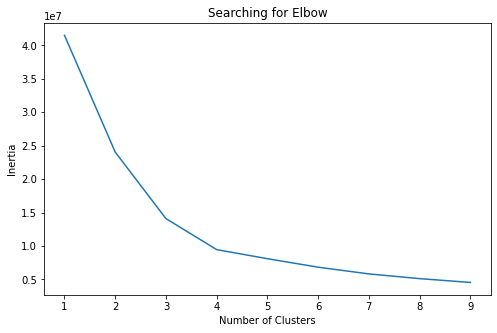

In [ ]:
clusters =[]
for i in range(1, 10):
    km = KMeans(n_clusters=i, random_state=0).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_samples, silhouette_score 

3-1) tempo와 popularity 변수로 군집분석

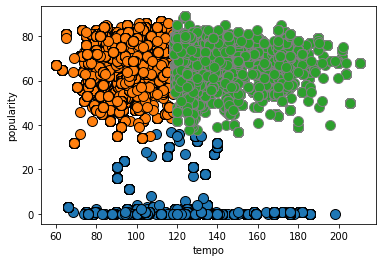

모든 데이터의 평균 실루엣 계수값: 0.4785611297296881
데이비스-볼딘지수: 0.7068100296608822


In [ ]:
km3 = KMeans(n_clusters=3, random_state=0).fit(X)
labels = km3.labels_

mglearn.discrete_scatter(X['tempo'], X['popularity'],labels , markers='o')
plt.xlabel("tempo")
plt.ylabel("popularity")
plt.show()

average_score = silhouette_score(X, labels)
print('모든 데이터의 평균 실루엣 계수값:', format(average_score)) 

dv = davies_bouldin_score(X, labels)
print('데이비스-볼딘지수:', format(dv))

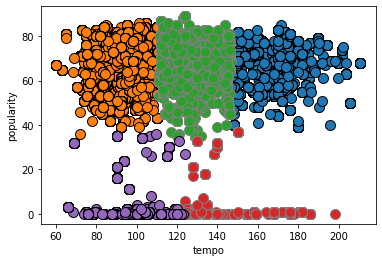

모든 데이터의 평균 실루엣 계수값: 0.4510122957547763
데이비스-볼딘지수: 0.7739193674186667


In [ ]:
km5 = KMeans(n_clusters=5, random_state=0).fit(X)
labels = km5.labels_

mglearn.discrete_scatter(X['tempo'], X['popularity'],labels, markers='o')
plt.xlabel("tempo")
plt.ylabel("popularity")
plt.show()

average_score = silhouette_score(X, labels)
print('모든 데이터의 평균 실루엣 계수값:', format(average_score)) 

dv = davies_bouldin_score(X, labels)
print('데이비스-볼딘지수:', format(dv)) 

3) 클러스터 유형 파악하기

In [ ]:
spotify_song['cluster'] = labels
spotify_song.head()

,song,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,top100,cluster
0,Oops!...I Did It Again,77,0.751,0.834,1,-5.444,0.0437,0.3,0.000018,0.355,0.894,95.053,pop,Yes,1
1,Oops!...I Did It Again,77,0.751,0.834,1,-5.444,0.0437,0.3,0.000018,0.355,0.894,95.053,pop,Yes,1
2,Oops!...I Did It Again,77,0.751,0.834,1,-5.444,0.0437,0.3,0.000018,0.355,0.894,95.053,pop,Yes,1
3,Oops!...I Did It Again,77,0.751,0.834,1,-5.444,0.0437,0.3,0.000018,0.355,0.894,95.053,pop,Yes,1
4,Oops!...I Did It Again,77,0.751,0.834,1,-5.444,0.0437,0.3,0.000018,0.355,0.894,95.053,pop,Yes,1


In [ ]:
spotify_song.groupby('cluster').count()

,song,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,top100
cluster,,,,,,,,,,,,,,
0,4955,4955,4955,4955,4955,4955,4955,4955,4955,4955,4955,4955,4955,4955
1,13310,13310,13310,13310,13310,13310,13310,13310,13310,13310,13310,13310,13310,13310
2,14229,14229,14229,14229,14229,14229,14229,14229,14229,14229,14229,14229,14229,14229
3,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371
4,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695


In [ ]:
#그룹별 평균값
spotify_song.groupby('cluster').mean()

,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,,,
0,67.642180,0.572482,0.753999,5.500101,-5.216297,0.135621,0.093381,0.001482,0.193488,0.552361,165.380383
1,68.363486,0.672019,0.686410,5.085950,-5.614771,0.109782,0.144469,0.005185,0.173701,0.540499,93.387994
2,68.097758,0.683780,0.724900,5.281959,-5.377382,0.080169,0.116583,0.009842,0.173741,0.549487,128.342570
3,3.491612,0.650346,0.718853,5.671772,-5.241353,0.104460,0.113205,0.019561,0.168172,0.531609,144.738230
4,5.564602,0.677313,0.672924,4.067257,-6.069449,0.081944,0.161777,0.031502,0.162370,0.540207,101.472346
